# Dimensionally Reduction
<h3> PCA LDA t-SNE - UMAP
PCA (Principal Component Analysis)
LDA (Linear Discriminant Analysis)
t-SNE - t-Distributed Stochastic Neighbor
UMAP (Uniform Manifold Approximation and Projection)</h3>

In [15]:
# PCA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [3]:
iris = load_iris()

In [4]:
X = iris.data
y = iris.target

In [5]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
y[:5]

array([0, 0, 0, 0, 0])

In [7]:
# Apply PCA
pca = PCA(n_components=2)

In [8]:
X_pca = pca.fit_transform(X)

In [9]:
X_pca[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

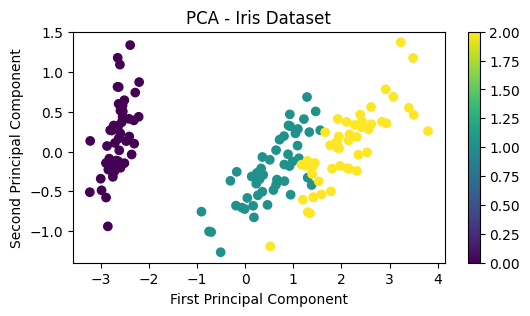

In [11]:
plt.figure(figsize=(6,3))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - Iris Dataset')
plt.colorbar()
plt.show()

In [12]:
# LDA

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [16]:
# LDA works on supervised Data (with labels)

In [17]:
lda = LDA(n_components=2)

In [18]:
X_lda = lda.fit_transform(X,y)

In [19]:
X_lda[:5]

array([[ 8.06179978, -0.30042062],
       [ 7.12868772,  0.78666043],
       [ 7.48982797,  0.26538449],
       [ 6.81320057,  0.67063107],
       [ 8.13230933, -0.51446253]])

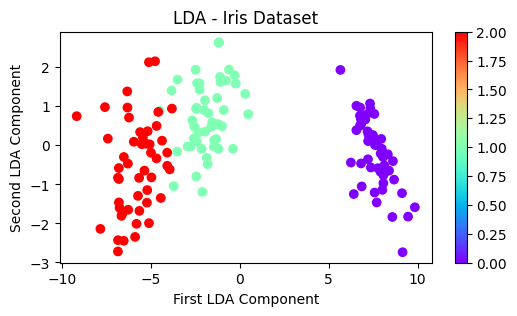

In [20]:
plt.figure(figsize=(6,3))
plt.scatter(X_lda[:,0],X_lda[:,1],c=y,cmap='rainbow')
plt.xlabel('First LDA Component')
plt.ylabel('Second LDA Component')
plt.title('LDA - Iris Dataset')
plt.colorbar()
plt.show()

In [22]:
# t-DIstributed Stochastic Neighbor Embedding (t-SNE)
# Good for visualizing high-dimensionally data in 2D or 3D.
# t-SNE is slow on large Datasets

In [23]:
from sklearn.manifold import TSNE

In [25]:
tsne = TSNE(n_components=2 , perplexity=30 , random_state=42)

In [26]:
X_tsne = tsne.fit_transform(X)

In [27]:
X_tsne[:5]

array([[-23.58093   ,  -0.52206016],
       [-26.291704  ,  -1.0936959 ],
       [-26.193335  ,   0.05305718],
       [-26.638256  ,  -0.32169643],
       [-23.545013  ,  -0.9413765 ]], dtype=float32)

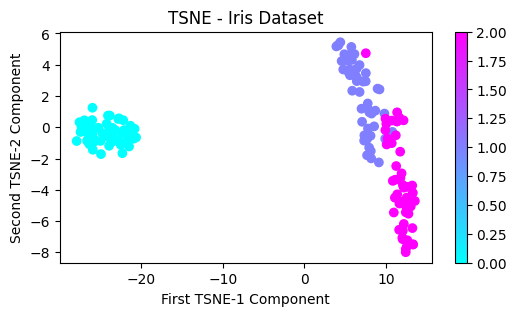

In [28]:
plt.figure(figsize=(6,3))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y,cmap='cool')
plt.xlabel('First TSNE-1 Component')
plt.ylabel('Second TSNE-2 Component')
plt.title('TSNE - Iris Dataset')
plt.colorbar()
plt.show()

In [29]:
# UMAP 
# Fast, powerful dimensionally reduction, both local and global structure better than TSNE

In [31]:
#!pip install umap-learn

In [32]:
import umap

In [34]:
# Apply UMAP
umap_reducer = umap.UMAP(n_components=2 , random_state=42)

In [36]:
X_umap = umap_reducer.fit_transform(X)

C:\Users\THIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\THIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


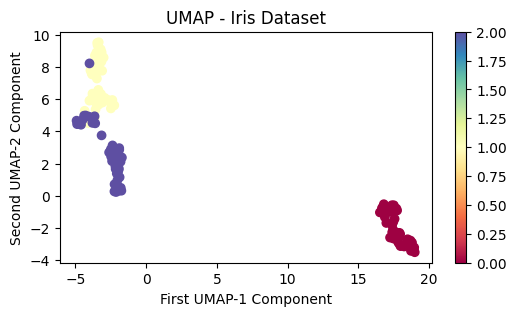

In [39]:
plt.figure(figsize=(6,3))
plt.scatter(X_umap[:,0],X_umap[:,1],c=y,cmap='Spectral')
plt.xlabel('First UMAP-1 Component')
plt.ylabel('Second UMAP-2 Component')
plt.title('UMAP - Iris Dataset')
plt.colorbar()
plt.show()

Method   - Super/Unsuper      - Good For,
PCA      - Unsupervised       - Max Variance Direction,
LDA      - Supervised         - Class Sepration,
t-SNE    - Unsupervised       - Visualization,
UMAP     - Unsupervised       - Visualization + Speed,

<h3>Use PCA when you want fast, linear projection</h3>
<h3>Use LDA for supervised task (classification)</h3>
<h4>Use t-SNE/UMAP mainly for beautiful Visualization of complex datasets!</h4>

<h1>---------------------------------------</h1>
<h4>Dimensionally Reduction + Classification Pipeline</h4>
<h5>PLAN</h5>
<h6>Load Dataset (Digits Dataset)</h6>
<h6>Apply Dimensionality Reduction (PCA/LDA/t-SNE/UMAP)</h6>
<h6>Train A Classifier (Random Forest)</h6>
<h6>Evaluate the model (Accuracy Score)</h6>

In [42]:
# import all required Libararies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import umap
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix

In [43]:
# Load Dataset
digits = load_digits()
X = digits.data
y = digits.target

In [44]:
print('Shape of Original Dataset',X.shape)

Shape of Original Dataset (1797, 64)


In [47]:
# Train-Test-Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
X_train.shape , X_test.shape

((1437, 64), (360, 64))

In [50]:
X_train[:2]

array([[ 0.,  0.,  3., 14.,  1.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,
         0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  5.,
        16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  5.,  2.,  0.,
         0.,  0.,  4., 16.,  2., 12., 15.,  2.,  0.,  0.,  1., 14., 13.,
         2., 13., 11.,  0.,  0.,  0.,  3., 11., 16., 13.,  4.,  0.],
       [ 0.,  0.,  9.,  9.,  4.,  0.,  0.,  0.,  0.,  0., 15., 15., 14.,
        12.,  0.,  0.,  0.,  3., 10.,  1.,  0., 12.,  5.,  0.,  0.,  5.,
         8.,  0.,  0.,  8.,  6.,  0.,  0.,  8.,  8.,  0.,  0.,  8.,  8.,
         0.,  0.,  5.,  8.,  0.,  0., 10.,  6.,  0.,  0.,  4., 13.,  4.,
         6., 13.,  0.,  0.,  0.,  0.,  6., 16., 14.,  3.,  0.,  0.]])

In [60]:
# Help to apply dimensionally reduction
def apply_reduction(method , X_train,X_test,y_train=None):
    if method=='pca':
        reducer = PCA(n_components=20) # Reduce to 20 Components
        X_train_red = reducer.fit_transform(X_train)
        X_test_red = reducer.fit_transform(X_test)
    elif method=='lda':
        reducer = LDA(n_components=9) # LDA can have most (classes 1) dimension (0-9)
        X_train_red = reducer.fit_transform(X_train,y_train)
        X_test_red = reducer.transform(X_test)
    elif method=='tsne':
        reducer = TSNE(n_components=2 , random_state=42) # Reduce to 2 Components
        X_train_red = reducer.fit_transform(X_train)
        X_test_red = reducer.fit_transform(X_test)
    elif method=='umap':
        reducer = umap.UMAP(n_components=20,random_state=42) # Reduce to 20 Components
        X_train_red = reducer.fit_transform(X_train)
        X_test_red = reducer.fit_transform(X_test)
    else:
        raise ValueError("Unknown Reduction Method")
    return X_train_red,X_test_red

In [61]:
# Help to train and Evaluate Classifier
def train_and_evaluate(X_train_red,X_test_red,y_train,y_test):
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_red , y_train)
    y_pred = clf.predict(X_test_red)

    acc = accuracy_score(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)

    print("Accuracy : ",acc*100)
    plt.figure(figsize=(4,2))
    sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

Using Method :  PCA
Accuracy :  60.0


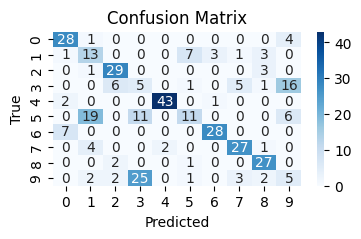

Using Method :  LDA
Accuracy :  95.83333333333334


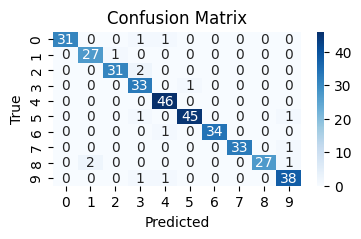

Using Method :  TSNE
Accuracy :  5.833333333333333


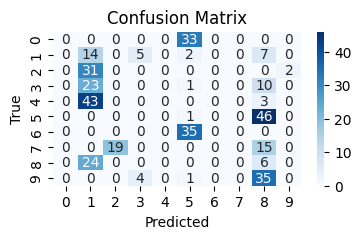

Using Method :  UMAP


C:\Users\THIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\THIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\THIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy :  4.166666666666666


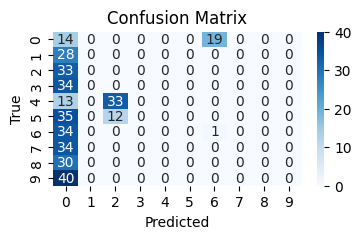

In [62]:
# Select Methods
for method in ['pca','lda','tsne','umap']:
    print("Using Method : ",method.upper())
    X_train_red , X_test_red = apply_reduction(method,X_train,X_test,y_train)
    train_and_evaluate(X_train_red,X_test_red,y_train,y_test)